In [1]:
import numpy as np
import pandas as pd
import json


In [2]:
df = pd.read_json('info.txt')
data=df['data']['stations']
df_station_info = pd.DataFrame.from_dict(data, orient='columns')

In [3]:
df_station_info.head()

,address,lat,lon,name,region_id,rental_methods,station_id
0,"20 King Street East, Hamilton",43.256317,-79.868664,Gore Park - 74,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_435
1,"200 James Street North, Hamilton",43.261819,-79.866743,James North at Mulberry - 76,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_436
2,"126 Catharine Street North, Hamilton",43.259111,-79.863613,Seedworks - 81B,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_527
3,"4 Cootes Drive, Hamilton",43.265679,-79.950420,Cootes at York and King,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_530
4,"89-101 Osler Drive, Hamilton",43.259550,-79.942643,Osler at Grant - 6,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_535


<h4>The number of bike stations in Hamilton:</h4>

In [4]:
len(df_station_info)

129

In [5]:
dg = pd.read_json('status.txt')
data=dg['data']['stations']
dg_station_status = pd.DataFrame.from_dict(data, orient='columns')
dg_station_status.last_reported = pd.to_datetime(dg_station_status.last_reported, unit='s')
dg_station_status.head()

,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,station_id
0,1,1,1,2018-02-06 23:59:50,11,0,5,hub_435
1,1,1,1,2018-02-06 23:59:50,7,0,13,hub_436
2,1,1,1,2018-02-06 23:59:50,6,0,8,hub_527
3,1,1,1,2018-02-06 23:59:50,1,0,10,hub_530
4,1,1,1,2018-02-06 23:59:50,2,0,8,hub_535


In [23]:
import os

current_path = os.path.abspath('../AWS/data')

folder_names = os.listdir(current_path)
current_path
folder_names 

data_folders = [os.path.join(current_path, folder_name) for folder_name in folder_names]

data_folders
# # matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# # [[el - 1 for el in row] for row in matrix]

data_files_paths = [os.path.join(folder_path, file_name)for folder_path in data_folders for file_name in os.listdir(folder_path)] 

data_files_paths = sorted(data_files_paths)

data_files_paths[0:2]


# #x[0] for x in data_files_paths]

['/home/mahsarm/Desktop/ML-projects/AWS/data/01-02-18/status-00-00.txt',
 '/home/mahsarm/Desktop/ML-projects/AWS/data/01-02-18/status-00-15.txt']

In [24]:
len(data_files_paths)

3915

In [25]:
data_files = data_files_paths
df_list = []
for data_file in data_files:
    
    dg = pd.read_json(data_file)
    
#     try:
#         dg = pd.read_json(data_file)
        
#     except:
#         print ('cannot open')
#         break
    data_js = dg['data']['stations']
    dg_station_status = pd.DataFrame.from_dict(data_js, orient='columns')
    dg_station_status.last_reported = dg_station_status.last_reported.mean().astype(int)
    dg_station_status.last_reported = pd.to_datetime(dg_station_status.last_reported, unit='s')
    dg_station_status = dg_station_status.set_index(['station_id','last_reported'], drop= False)
    dg_station_status = dg_station_status.tz_localize('UTC', level=1)
    dg_station_status = dg_station_status.tz_convert(tz='America/Toronto', level=1)
    
    df_list.append(dg_station_status)
df_list[:2]


[                                      is_installed  is_renting  is_returning  \
 station_id last_reported                                                       
 hub_435    2018-01-31 19:00:02-05:00             1           1             1   
 hub_436    2018-01-31 19:00:02-05:00             1           1             1   
 hub_527    2018-01-31 19:00:02-05:00             1           1             1   
 hub_530    2018-01-31 19:00:02-05:00             1           1             1   
 hub_535    2018-01-31 19:00:02-05:00             1           1             1   
 hub_536    2018-01-31 19:00:02-05:00             1           1             1   
 hub_537    2018-01-31 19:00:02-05:00             1           1             1   
 hub_538    2018-01-31 19:00:02-05:00             1           1             1   
 hub_539    2018-01-31 19:00:02-05:00             1           1             1   
 hub_540    2018-01-31 19:00:02-05:00             1           1             1   
 hub_541    2018-01-31 19:00

In [26]:
dfff = pd.concat(df_list)
bikes = dfff.sort_index()
bikes

is_installed  is_renting  is_returning  \
station_id last_reported                                                       
hub_1063   2018-01-02 18:59:06-05:00             1           1             1   
           2018-01-02 19:14:05-05:00             1           1             1   
           2018-01-02 19:29:12-05:00             1           1             1   
           2018-01-02 19:44:12-05:00             1           1             1   
           2018-01-02 19:59:47-05:00             1           1             1   
           2018-01-02 20:14:21-05:00             1           1             1   
           2018-01-02 20:29:38-05:00             1           1             1   
           2018-01-02 20:45:02-05:00             1           1             1   
           2018-01-02 21:00:02-05:00             1           1             1   
           2018-01-02 21:14:11-05:00             1           1             1   
           2018-01-02 21:29:12-05:00             1           1             1   
           2018-01-02 21:45:03-05:00             1           1             1   
           2018-01-02 21:59:11-05:00             1           1             1   
           2018-01-02 22:14:12-05:00             1           1             1   
           2018-01-02 22:29:12-05:00             1           1             1   
           2018-01-02 22:45:03-05:00             1           1             1   
           2018-01-02 22:59:12-05:00             1           1             1   
           2018-01-02 23:14:12-05:00             1           1             1   
           2018-01-02 23:30:00-05:00             1           1             1   
           2018-01-02 23:44:21-05:00             1           1             1   
           2018-01-02 23:59:05-05:00             1           1             1   
           2018-01-03 00:14:47-05:00             1           1             1   
           2018-01-03 00:29:37-05:00             1           1             1   
           2018-01-03 00:44:37-05:00             1           1             1   
           2018-01-03 00:59:37-05:00             1           1             1   
           2018-01-03 01:14:28-05:00             1           1             1   
           2018-01-03 01:29:12-05:00             1           1             1   
           2018-01-03 01:45:04-05:00             1           1             1   
           2018-01-03 02:00:03-05:00             1           1             1   
           2018-01-03 02:14:12-05:00             1           1             1   
...                                            ...         ...           ...   
hub_960    2018-02-12 11:29:27-05:00             1           1             1   
           2018-02-12 11:44:27-05:00             1           1             1   
           2018-02-12 12:00:03-05:00             1           1             1   
           2018-02-12 12:14:09-05:00             1           1             1   
           2018-02-12 12:29:09-05:00             1           1             1   
           2018-02-12 12:44:26-05:00             1           1             1   
           2018-02-12 13:00:03-05:00             1           1             1   
           2018-02-12 13:14:09-05:00             1           1             1   
           2018-02-12 13:29:25-05:00             1           1             1   
           2018-02-12 13:45:02-05:00             1           1             1   
           2018-02-12 13:59:21-05:00             1           1             1   
           2018-02-12 14:14:17-05:00             1           1             1   
           2018-02-12 14:29:54-05:00             1           1             1   
           2018-02-12 14:44:30-05:00             1           1             1   
           2018-02-12 15:00:02-05:00             1           1             1   
           2018-02-12 15:14:27-05:00             1           1             1   
           2018-02-12 15:29:26-05:00             1           1             1   
           2018-02-12 15:44:27-05:00  

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

#bikes.plot(x=xcol, y='Sales', ax=ax, alpha=0.5, color='r')

In [28]:
available_bikes = bikes.groupby(['last_reported'])['num_bikes_available'].sum()
available_bikes.head()

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'last_reported' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


last_reported
2018-01-02 23:59:06    530
2018-01-03 00:14:05    531
2018-01-03 00:29:12    532
2018-01-03 00:44:12    535
2018-01-03 00:59:47    532
Name: num_bikes_available, dtype: int64

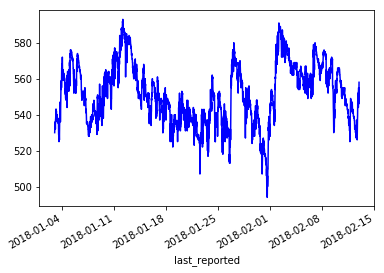

In [29]:
available_bikes.plot(x='last_reported', y='num_bikes_available',color='b')

In [30]:
available_bikes.ix['2018-01-03 8:00:00':'2018-01-03 9:00:00']

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


last_reported
2018-01-03 08:14:11    536
2018-01-03 08:29:38    538
2018-01-03 08:44:25    538
2018-01-03 08:59:47    537
Name: num_bikes_available, dtype: int64

In [31]:
bikes = bikes[~bikes.index.duplicated(keep='first')]
bikes

is_installed  is_renting  is_returning  \
station_id last_reported                                                       
hub_1063   2018-01-02 18:59:06-05:00             1           1             1   
           2018-01-02 19:14:05-05:00             1           1             1   
           2018-01-02 19:29:12-05:00             1           1             1   
           2018-01-02 19:44:12-05:00             1           1             1   
           2018-01-02 19:59:47-05:00             1           1             1   
           2018-01-02 20:14:21-05:00             1           1             1   
           2018-01-02 20:29:38-05:00             1           1             1   
           2018-01-02 20:45:02-05:00             1           1             1   
           2018-01-02 21:00:02-05:00             1           1             1   
           2018-01-02 21:14:11-05:00             1           1             1   
           2018-01-02 21:29:12-05:00             1           1             1   
           2018-01-02 21:45:03-05:00             1           1             1   
           2018-01-02 21:59:11-05:00             1           1             1   
           2018-01-02 22:14:12-05:00             1           1             1   
           2018-01-02 22:29:12-05:00             1           1             1   
           2018-01-02 22:45:03-05:00             1           1             1   
           2018-01-02 22:59:12-05:00             1           1             1   
           2018-01-02 23:14:12-05:00             1           1             1   
           2018-01-02 23:30:00-05:00             1           1             1   
           2018-01-02 23:44:21-05:00             1           1             1   
           2018-01-02 23:59:05-05:00             1           1             1   
           2018-01-03 00:14:47-05:00             1           1             1   
           2018-01-03 00:29:37-05:00             1           1             1   
           2018-01-03 00:44:37-05:00             1           1             1   
           2018-01-03 00:59:37-05:00             1           1             1   
           2018-01-03 01:14:28-05:00             1           1             1   
           2018-01-03 01:29:12-05:00             1           1             1   
           2018-01-03 01:45:04-05:00             1           1             1   
           2018-01-03 02:00:03-05:00             1           1             1   
           2018-01-03 02:14:12-05:00             1           1             1   
...                                            ...         ...           ...   
hub_960    2018-02-12 11:29:27-05:00             1           1             1   
           2018-02-12 11:44:27-05:00             1           1             1   
           2018-02-12 12:00:03-05:00             1           1             1   
           2018-02-12 12:14:09-05:00             1           1             1   
           2018-02-12 12:29:09-05:00             1           1             1   
           2018-02-12 12:44:26-05:00             1           1             1   
           2018-02-12 13:00:03-05:00             1           1             1   
           2018-02-12 13:14:09-05:00             1           1             1   
           2018-02-12 13:29:25-05:00             1           1             1   
           2018-02-12 13:45:02-05:00             1           1             1   
           2018-02-12 13:59:21-05:00             1           1             1   
           2018-02-12 14:14:17-05:00             1           1             1   
           2018-02-12 14:29:54-05:00             1           1             1   
           2018-02-12 14:44:30-05:00             1           1             1   
           2018-02-12 15:00:02-05:00             1           1             1   
           2018-02-12 15:14:27-05:00             1           1             1   
           2018-02-12 15:29:26-05:00             1           1             1   
           2018-02-12 15:44:27-05:00  

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'last_reported' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


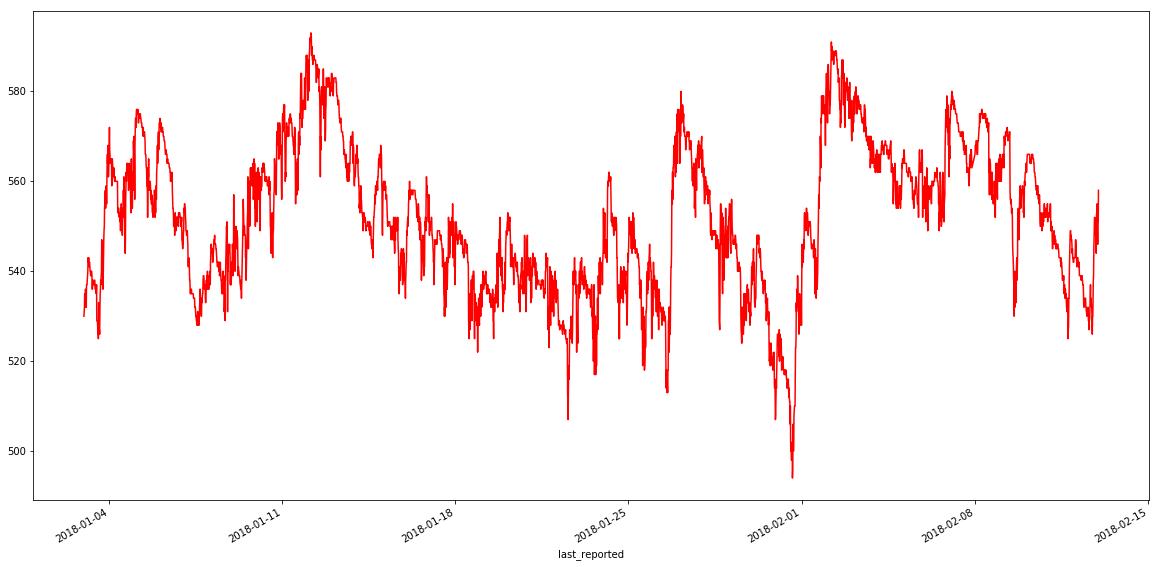

In [32]:
available_bikes = bikes.groupby(['last_reported'])['num_bikes_available'].sum()

available_bikes.plot(figsize=(20,10),x='last_reported', y='num_bikes_available',color='r')


/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


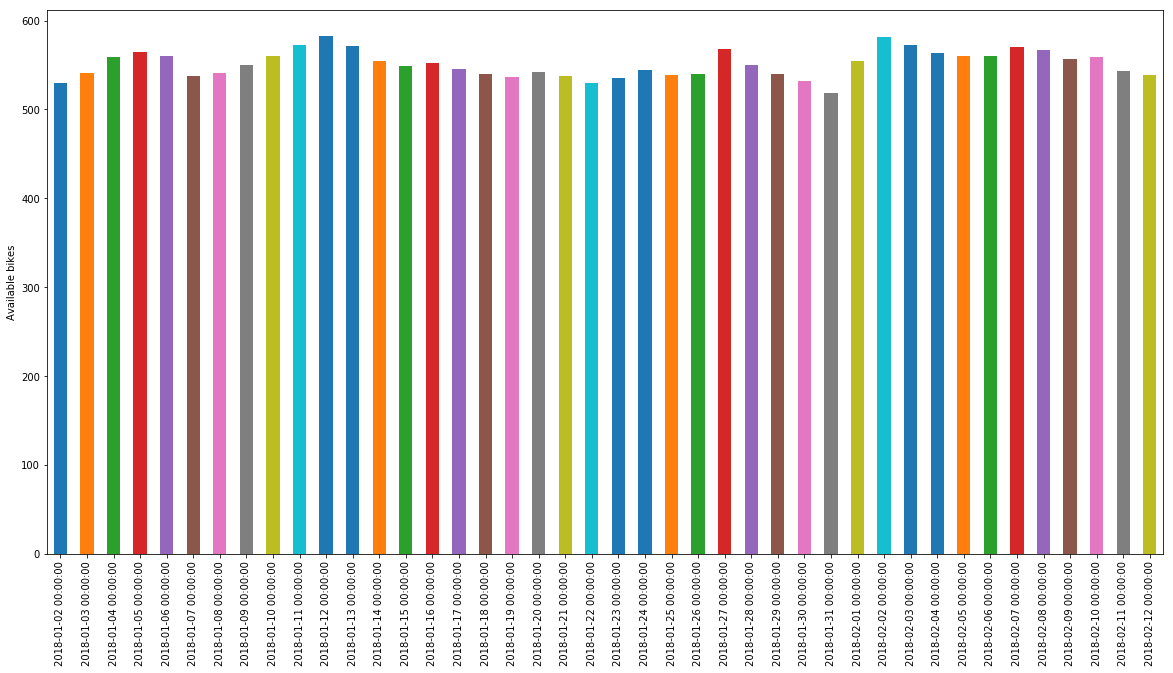

In [33]:

day_bikes = bikes.groupby(bikes['last_reported'])['num_bikes_available'].sum().resample('D', how='mean')
# daily_use = pd.DataFrame(day_bikes)
# daily_use['day'] =  daily_use.index.dayofweek

plot1 = day_bikes.plot(kind='bar',figsize=(20,10))
plot1.set_xlabel("")
plot1.set_ylabel("Available bikes")

# df.groupby([times.hour, times.minute]).value_col.sum()

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


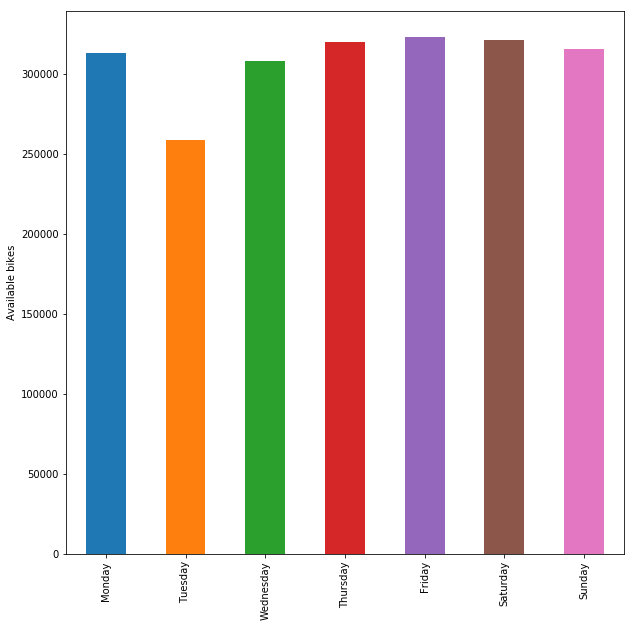

In [34]:
#bikes['day'] = bikes['last_reported'].dt.day
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plot2 = bikes.groupby(bikes['last_reported'].dt.weekday.astype('category',ordered=True).cat.rename_categories(cats))['num_bikes_available'].sum().plot(kind='bar', figsize=(10,10))
plot2.set_xlabel("")
plot2.set_ylabel("Available bikes")

In [35]:
station_activities = bikes[['num_bikes_available']].groupby('station_id').diff()

In [36]:
station_activities = station_activities.fillna(0)
station_activities = station_activities.reset_index()


,station_id,last_reported,num_bikes_available
0,hub_1063,2018-01-02 18:59:06-05:00,0.0
1,hub_1063,2018-01-02 19:14:05-05:00,0.0
2,hub_1063,2018-01-02 19:29:12-05:00,0.0
3,hub_1063,2018-01-02 19:44:12-05:00,0.0
4,hub_1063,2018-01-02 19:59:47-05:00,0.0


In [37]:
df_station_info.head()

,address,lat,lon,name,region_id,rental_methods,station_id
0,"20 King Street East, Hamilton",43.256317,-79.868664,Gore Park - 74,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_435
1,"200 James Street North, Hamilton",43.261819,-79.866743,James North at Mulberry - 76,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_436
2,"126 Catharine Street North, Hamilton",43.259111,-79.863613,Seedworks - 81B,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_527
3,"4 Cootes Drive, Hamilton",43.265679,-79.950420,Cootes at York and King,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_530
4,"89-101 Osler Drive, Hamilton",43.259550,-79.942643,Osler at Grant - 6,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_535


In [38]:
df_station_info.set_index('station_id', inplace=True)

In [39]:

station_activities['num_bikes_available'] = station_activities['num_bikes_available'].abs()
df_station_info['activity_total'] = station_activities.groupby(['station_id'])['num_bikes_available'].sum()
df_station_info.head()


,address,lat,lon,name,region_id,rental_methods,activity_total
station_id,,,,,,,
hub_435,"20 King Street East, Hamilton",43.256317,-79.868664,Gore Park - 74,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",542.0
hub_436,"200 James Street North, Hamilton",43.261819,-79.866743,James North at Mulberry - 76,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",449.0
hub_527,"126 Catharine Street North, Hamilton",43.259111,-79.863613,Seedworks - 81B,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",650.0
hub_530,"4 Cootes Drive, Hamilton",43.265679,-79.950420,Cootes at York and King,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",104.0
hub_535,"89-101 Osler Drive, Hamilton",43.259550,-79.942643,Osler at Grant - 6,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",50.0


In [40]:
total_bikes = bikes.groupby(['station_id']).apply(lambda x:x.iloc[0]['num_bikes_available']+x.iloc[0]['num_docks_available'])
total_bikes.head()

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'station_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


station_id
hub_1063     4
hub_1252     6
hub_1253    10
hub_1287    10
hub_1397     6
dtype: int64

In [41]:
import os
from bokeh.io import show, output_notebook
from bokeh.models import (
                         GMapPlot, GMapOptions, ColumnDataSource, Circle, Range1d, PanTool,
                         WheelZoomTool, BoxSelectTool)
from bokeh.plotting import ColumnDataSource


In [42]:
output_notebook()

Loading BokehJS ...

In [79]:


map_options = GMapOptions(lat= 43.25, lng=-79.89, map_type= 'roadmap', zoom =13)
plot = GMapPlot(x_range=Range1d(), y_range=Range1d(), map_options=map_options)
plot.title.text = "Hamilton Bike Share"
plot.api_key = os.environ["GOOGLE__APIKEY"] 

df_station_info['Scaled_total_activity'] = df_station_info['activity_total']/30

df_station_info ['station_docks'] = total_bikes /2

stations_data = ColumnDataSource(
    data = df_station_info
)


circle_activities = Circle(x="lon", y="lat", size = 'Scaled_total_activity', fill_color="blue", fill_alpha=0.8, line_color=None)
circle_docks = Circle(x="lon", y="lat", size = 'station_docks', fill_color="red", fill_alpha=0.8, line_color=None)
plot.add_glyph(stations_data, circle_activities)
plot.add_glyph(stations_data, circle_docks)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
plot.width=900
show(plot)

In [141]:
weather_activities = pd.read_csv('data/weather-data.csv')
weather_activities['Date/Time']=weather_activities['Date/Time'].apply(lambda x: x.encode('utf-8').strip())
weather_activities['Date/Time'] = pd.to_datetime(weather_activities['Date/Time'])
weather_activities = weather_activities.set_index('Date/Time')
weather_activities.head()

,Unnamed: 0,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-01-03 00:00:00,0,2018,1,3,00:00,‡,-12.8,,-15.3,,...,,24.1,,99.19,,,,-18,,Blowing Snow
2018-01-03 01:00:00,1,2018,1,3,01:00,‡,-10.7,,-13.6,,...,,24.1,,99.11,,,,-20,,Cloudy
2018-01-03 02:00:00,2,2018,1,3,02:00,‡,-10.7,,-14.0,,...,,24.1,,99.08,,,,-20,,Blowing Snow
2018-01-03 03:00:00,3,2018,1,3,03:00,‡,-10.6,,-14.1,,...,,24.1,,99.06,,,,-20,,NA
2018-01-03 04:00:00,4,2018,1,3,04:00,‡,-10.6,,-14.3,,...,,24.1,,99.04,,,,-20,,Mostly Cloudy


In [121]:
Hour_activities =  bikes.groupby(bikes['last_reported'])['num_bikes_available'].sum().resample('H', how='mean')

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [145]:
hr_activities = pd.DataFrame(Hour_activities.values, 
                                  columns = ['available_bikes']).set_index(Hour_activities.index)
hr_activities.index.names = ['Date/Time']
hr_activities.head()

,available_bikes
Date/Time,
2018-01-02 23:00:00,530.000000
2018-01-03 00:00:00,532.500000
2018-01-03 01:00:00,534.333333
2018-01-03 02:00:00,535.400000
2018-01-03 03:00:00,540.000000


In [147]:
weather_activities['Avaiable_bikes'] = hr_activities.available_bikes
weather_activities

,Unnamed: 0,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,...,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Avaiable_bikes
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-01-03 00:00:00,0,2018,1,3,00:00,‡,-12.8,,-15.3,,...,24.1,,99.19,,,,-18,,Blowing Snow,532.500000
2018-01-03 01:00:00,1,2018,1,3,01:00,‡,-10.7,,-13.6,,...,24.1,,99.11,,,,-20,,Cloudy,534.333333
2018-01-03 02:00:00,2,2018,1,3,02:00,‡,-10.7,,-14.0,,...,24.1,,99.08,,,,-20,,Blowing Snow,535.400000
2018-01-03 03:00:00,3,2018,1,3,03:00,‡,-10.6,,-14.1,,...,24.1,,99.06,,,,-20,,NA,540.000000
2018-01-03 04:00:00,4,2018,1,3,04:00,‡,-10.6,,-14.3,,...,24.1,,99.04,,,,-20,,Mostly Cloudy,542.250000
2018-01-03 05:00:00,5,2018,1,3,05:00,‡,-9.8,,-13.6,,...,24.1,,98.97,,,,-19,,Blowing Snow,541.250000
2018-01-03 06:00:00,6,2018,1,3,06:00,‡,-9.6,,-12.8,,...,24.1,,98.96,,,,-17,,Blowing Snow,539.333333
2018-01-03 07:00:00,0,2018,1,3,07:00,‡,-11.0,,-15.1,,...,19.3,,98.96,,,,-20,,"Snow, Blowing Snow",539.000000
2018-01-03 08:00:00,7,2018,1,3,08:00,‡,-11.0,,-14.3,,...,24.1,,98.94,,,,-19,,NA,537.250000
